In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from microfit.histogram import Histogram, Binning, MultiChannelBinning, HistogramGenerator, MultiChannelHistogram

In [4]:
df = pd.DataFrame()
df["x"] = [0.5, 0.5, 0.5, 1.5, 0.5, 0.5, 0.5, 1.5]
df["y"] = [0.5, 1.5, 0.5, 1.5, 0.5, 1.5, 0.5, 1.5]
df["weights"] = [0.5, 0.5, 0.5, 0.5, 0.8, 0.8, 0.8, 0.8]

# A "data-like" dataframe, where weights are all equal to 1
df_data = pd.DataFrame()
df_data["x"] = [0.5, 0.5, 1.5, 0.5]
df_data["y"] = [0.5, 1.5, 1.5, 0.5]
df_data["weights"] = [1, 1, 1, 1]

In [5]:
binning = MultiChannelBinning([
    Binning("x", bin_edges=np.array([0, 1, 2]), label="x1"),
    # superfluous binning in same variable
    Binning("x", bin_edges=np.array([0, 1, 2]), label="x2"),
    # binning  in y
    Binning("y", bin_edges=np.array([0, 1, 2]), label="y"),
])
data_binning = MultiChannelBinning([
    Binning("x", bin_edges=np.array([0, 1, 2]), label="x1"),
    Binning("x", bin_edges=np.array([0, 1, 2]), label="x2"),
])
hg = HistogramGenerator(df, binning)
# Measurement taken in the x-channel, using redundant binning
hg_data = HistogramGenerator(df_data, data_binning)

In [6]:
hist = hg.generate()
hist_data = hg_data.generate()

assert isinstance(hist, MultiChannelHistogram)
assert isinstance(hist_data, MultiChannelHistogram)

<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

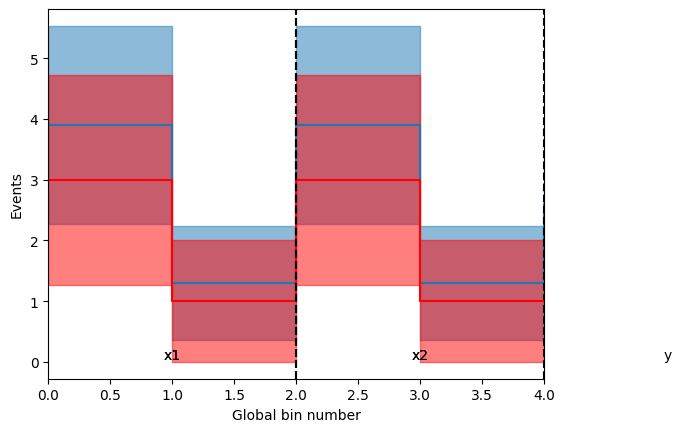

In [7]:
fig, ax = plt.subplots()
hist.draw(ax=ax)
hist_data.draw(ax=ax, color="red", label="data")

In [8]:
hist._bin_counts

array([[3.9, 0. , 3.9, 0. , 2.6, 1.3],
       [0. , 1.3, 0. , 1.3, 0. , 1.3],
       [3.9, 0. , 3.9, 0. , 2.6, 1.3],
       [0. , 1.3, 0. , 1.3, 0. , 1.3],
       [2.6, 0. , 2.6, 0. , 2.6, 0. ],
       [1.3, 1.3, 1.3, 1.3, 0. , 2.6]])

<AxesSubplot:title={'center':'Covariance matrix'}>

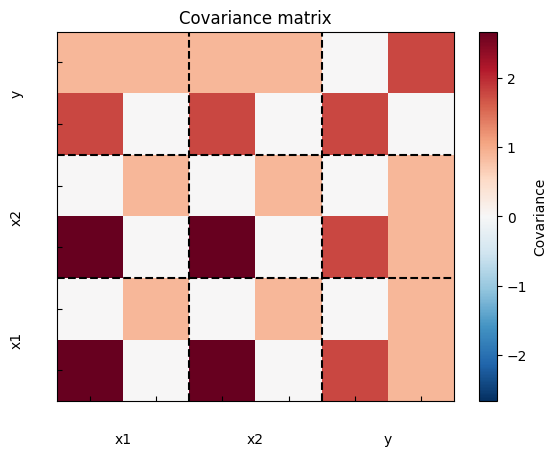

In [9]:
hist.draw_covariance_matrix(as_correlation=False)

<AxesSubplot:title={'center':'Covariance matrix'}>

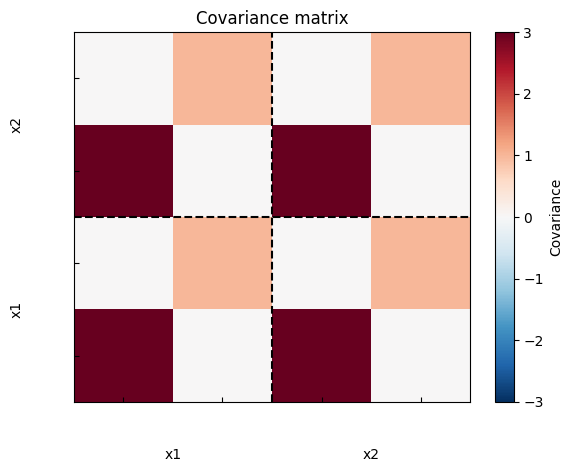

In [10]:
hist_data.draw_covariance_matrix(as_correlation=False)

In [11]:
hist._bin_counts += np.eye(hist.n_bins) * 0.001
hist_data._bin_counts += np.eye(hist_data.n_bins) * 0.001
updated_hist_2ch = hist.update_with_measurement(hist_data)
updated_hist_1ch = hist[["x1", "y"]].update_with_measurement(hist_data[["x1"]])

In [12]:
print(updated_hist_2ch.covariance_matrix)
print(updated_hist_1ch.covariance_matrix)

[[ 1.27028009 -0.25485995]
 [-0.25485995  1.2703426 ]]
[[ 1.27032177 -0.25483912]
 [-0.25483912  1.27044674]]


In [13]:
print(updated_hist_2ch._bin_counts)
print(updated_hist_1ch._bin_counts)

[[2.34327645 0.        ]
 [0.         2.34329752]]
[[2.34329752 0.        ]
 [0.         2.34333965]]
